In [1]:
# pip install pandas matplotlib seaborn

In [2]:
#read csv valid responses

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


valid_responses = pd.read_csv('valid_responses.csv')
valid_responses.head(1)

total_valid_responses = len(valid_responses)

/var/folders/_n/834qbp2x5yx2z7lztkn63hh40000gn/T/ipykernel_17926/3015072404.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
def plot_qa_vs_not_qa(quantified_any, quantified_all, quantified_cost, quantified_benefit, quantified_consequence, not_quantify, title, title_prefix, title_suffix="", rotate=None):
    # Add a new column to each DataFrame to distinguish the groups
    quantified_any['Type'] = 'Quantified any concepts'
    quantified_all['Type'] = 'Quantified all concepts'
    quantified_cost['Type'] = 'Quantified cost'
    quantified_benefit['Type'] = 'Quantified benefits'
    quantified_consequence['Type'] = 'Quantified consequences'
    not_quantify['Type'] = 'Did not quantify'

    # Concatenate the two DataFrames
    combined_data = pd.concat([quantified_any, quantified_all, quantified_cost, quantified_benefit, quantified_consequence, not_quantify])


    # Plotting
    plt.figure(figsize=(12, 5))
    ax = sns.barplot(data=combined_data, x=title, y='Number of Respondents', hue='Type', palette='Set2')

    # Set chart title and labels
    plt.title(title_prefix + title + title_suffix)
    plt.xlabel(title)
    plt.ylabel('Number of Respondents')
    plt.yticks(range(0, max(combined_data['Number of Respondents']) + 1 , 2))
    plt.tight_layout()

    # Rotate
    if rotate:
        plt.xticks(rotation=rotate)

    #save fig with title
    plt.savefig('Plots/Disc_' + title + '.svg')

    # Show the plot
    plt.show()

# Those who formally or informally quantifiied

In [4]:
valid_responses['Q11'].fillna('Unknown', inplace=True)
valid_responses['Q13'].fillna('Unknown', inplace=True)
valid_responses['Q16'].fillna('Unknown', inplace=True)

/var/folders/_n/834qbp2x5yx2z7lztkn63hh40000gn/T/ipykernel_17926/1828737848.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  valid_responses['Q11'].fillna('Unknown', inplace=True)
/var/folders/_n/834qbp2x5yx2z7lztkn63hh40000gn/T/ipykernel_17926/1828737848.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [5]:
quantified_all = valid_responses.loc[(valid_responses['Q11'].str.contains('Yes,')) & (valid_responses['Q13'].str.contains('Yes,')) & (valid_responses['Q16'].str.contains('Yes,'))]
len(quantified_all)


12

In [6]:
#filter records for Q11, Q13, Q16
quantified_any = valid_responses.loc[(valid_responses['Q11'].str.contains('Yes,')) | (valid_responses['Q13'].str.contains('Yes,')) | (valid_responses['Q16'].str.contains('Yes,'))]
len(quantified_any)

35

In [7]:
quantified_cost = valid_responses.loc[valid_responses['Q11'].str.contains('Yes, ')]
quantified_benefit = valid_responses.loc[valid_responses['Q13'].str.contains('Yes,')]
quantified_consequence = valid_responses.loc[valid_responses['Q16'].str.contains('Yes,')]

len(quantified_cost), len(quantified_benefit), len(quantified_consequence)


(17, 23, 26)

# Those who DID NOT formally or informally quantify

In [8]:
# did_not_quantify_any = valid_responses.loc[((valid_responses['Q11'].str.contains('NO,')) & (valid_responses['Q13'].str.contains('NO,')) & (valid_responses['Q16'].str.contains('NO,')))]
did_not_quantify_any = valid_responses.loc[((valid_responses['Q11'].str.contains('NO,')) & (valid_responses['Q13'].str.contains('NO,')) & (valid_responses['Q16'].str.contains('NO,')))]
len(did_not_quantify_any)

2

# Practitioner profile and tendency to quantify

## Role at Work of those who quantified Vs did not quantify

In [9]:
def get_role_counts(role_df):
    role_counts = role_df['Q3'].value_counts().reset_index()
    role_counts.columns = ['Role at Work', 'Number of Respondents']
    role_counts['Role at Work'] = role_counts['Role at Work'].str.replace('/', '/\n').str.replace('Quality Assurance Engineer (QAE)', 'QA Engineer')

    #calculate percentages
    # role_counts['Perentage of respondents'] = role_counts['Number of Respondents']/len(valid_responses)*100
    return role_counts


/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

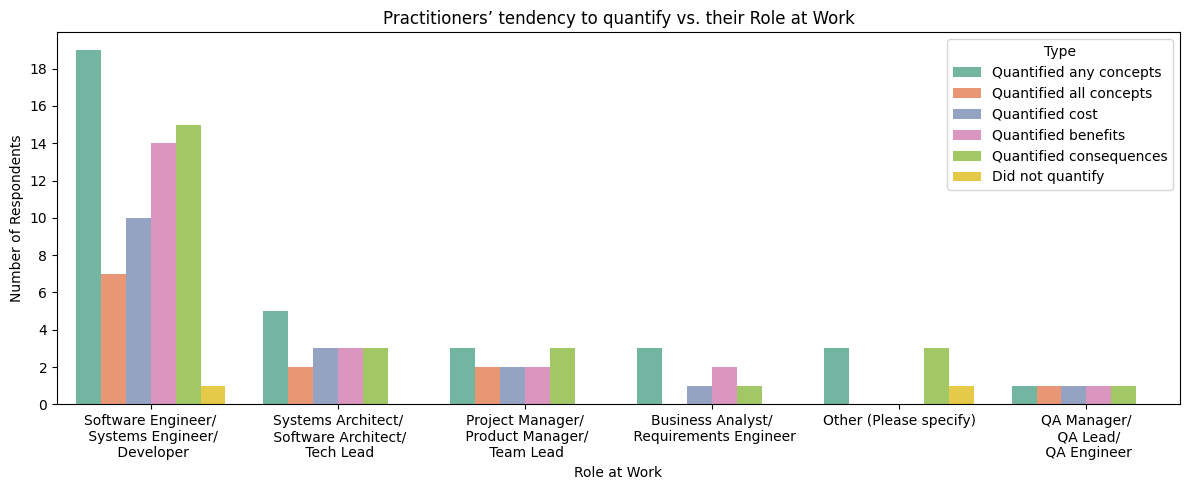

In [10]:
plot_qa_vs_not_qa(get_role_counts(quantified_any), get_role_counts(quantified_all), 
                  get_role_counts(quantified_cost), get_role_counts(quantified_benefit), get_role_counts(quantified_consequence),
                  get_role_counts(did_not_quantify_any), 'Role at Work', "Practitioners’ tendency to quantify vs. their ")

#save fig to plots folder

#plt.savefig('plots/D_role_at_work.svg')



## Experience at Work of those who quantified Vs did not quantify

In [11]:
def get_exp_counts(exp_df):
    role_exp_counts = exp_df['Q5'].value_counts().reset_index()
    role_exp_counts.columns = ['Experience at Work', 'Number of Respondents']
    role_exp_counts['Experience at Work'] = role_exp_counts['Experience at Work'] #.str.replace('/', '/\n')

    #calculate percentages
    # role_exp_counts['Perentage of respondents'] = role_exp_counts['Number of Respondents']/role_exp_counts['Number of Respondents'].sum()*100

    # Calculate proportions
    #role_counts['Proportion'] = role_counts['Number of Respondents']

    return role_exp_counts

/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

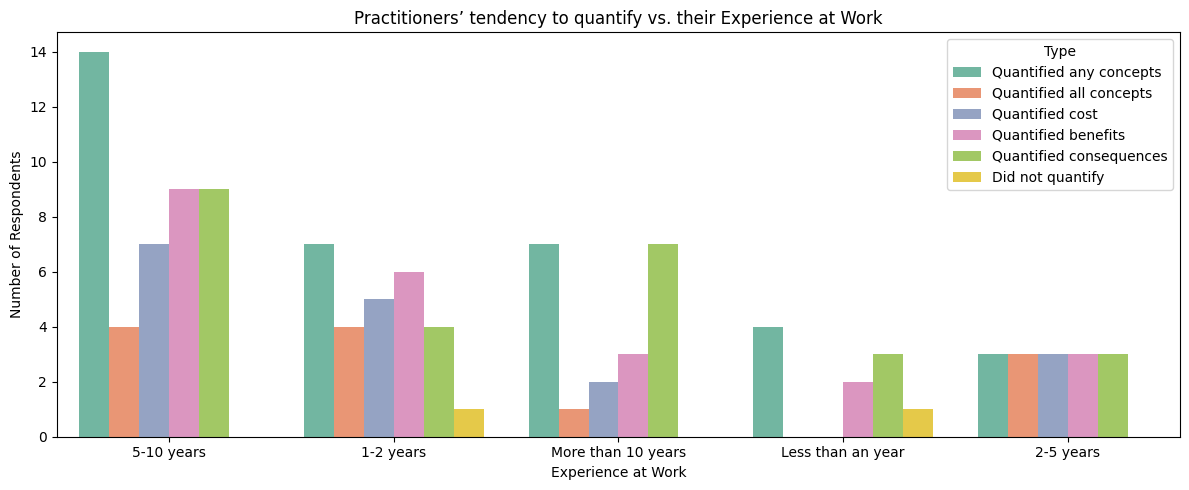

In [12]:
#plot_qa_vs_not_qa(get_exp_counts(quantified_cost), get_exp_counts(not_quantified_cost), 'Experience at Work')

plot_qa_vs_not_qa(get_exp_counts(quantified_any), get_exp_counts(quantified_all), 
                  get_exp_counts(quantified_cost), get_exp_counts(quantified_benefit), get_exp_counts(quantified_consequence),
                  get_exp_counts(did_not_quantify_any), 'Experience at Work', "Practitioners’ tendency to quantify vs. their ")


#save fig to plots folder

#plt.savefig('plots/D_exp_at_work.svg')

## Primary activities performed by those who quantified Vs did not quantify

In [13]:

def data_formatting(activity_df):
    activity_df['Q50'] = activity_df['Q50'].str.replace(', e.g.,', '\n e.g. ')
    # activity_df['Q50'] = activity_df['Q50'].str.replace(r'\, e\.g\..*', '', regex=True)
    # activity_df['Q50'] = activity_df['Q50'].str.replace(r'\, i\.e\..*', '', regex=True)
    # activity_df['Q50'] = activity_df['Q50'].str.replace(r'\n e.g\..*', '', regex=True)

    activity_df['Q50'] = activity_df['Q50'].str.replace(', i.e., ', '\n i.e. ')
    activity_df['Q50'] = activity_df['Q50'].str.replace('System Requirements Specification (SRS), as User Stories, as Use Case Diagrams', '\n System Requirements Specification (SRS) \n or as User Stories or as Use Case Diagrams')
    activity_df['Q50'] = activity_df['Q50'].str.replace('through stakeholder interviews, user forums, and observations', '\n through stakeholder interviews or user forums or observations')
    activity_df['Q50'] = activity_df['Q50'].str.replace('to validate that requirements have been implemented correctly, to test that the software functions', 'to validate that requirements have been implemented correctly \n or to test that the software functions')
    activity_df['Q50'] = activity_df['Q50'].str.replace('what requirements to implement, what to refactor', '\n what requirements to implement or what to refactor')
    activity_df['Q50'] = activity_df['Q50'].str.replace('implement features that satisfy', 'implement features \n that satisfy')
    activity_df['Q50'] = activity_df['Q50'].str.replace('design decisions to accommodate', 'design decisions \n to accommodate')
    activity_df['Q50'] = activity_df['Q50'].str.replace('or as User Stories in a', '\n or as User Stories in a')

    #insert_newline(activity_df['Q50'])

In [14]:


def get_activity_counts(activity_df):
    
    data_formatting(activity_df)

    activities = activity_df['Q50'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
    activities = activities.str.replace(r'\n.*', '', regex=True)
    activities = activities.str.replace('software code to implement features', 'software code \n to implement features')




    activity_counts = activities.value_counts().reset_index()

    #rename columns to Primary activities performed and Number of Respondents

    activity_counts.columns = ['Primary activities performed', 'Number of Respondents']
    #calculate percentages
    activity_counts['Perentage of respondents'] = activity_counts['Number of Respondents']/activity_counts['Number of Respondents'].sum()*100

    return activity_counts


/var/folders/_n/834qbp2x5yx2z7lztkn63hh40000gn/T/ipykernel_17926/3875143239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_df['Q50'] = activity_df['Q50'].str.replace(', e.g.,', '\n e.g. ')
/var/folders/_n/834qbp2x5yx2z7lztkn63hh40000gn/T/ipykernel_17926/3875143239.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_df['Q50'] = activity_df['Q50'].str.replace(', i.e., ', '\n i.e. ')
/var/folders/_n/834qbp2x5yx2z7lztkn63hh40000gn/T/ipykernel_17926/3875143239.py:8: SettingWithCopyWarning:

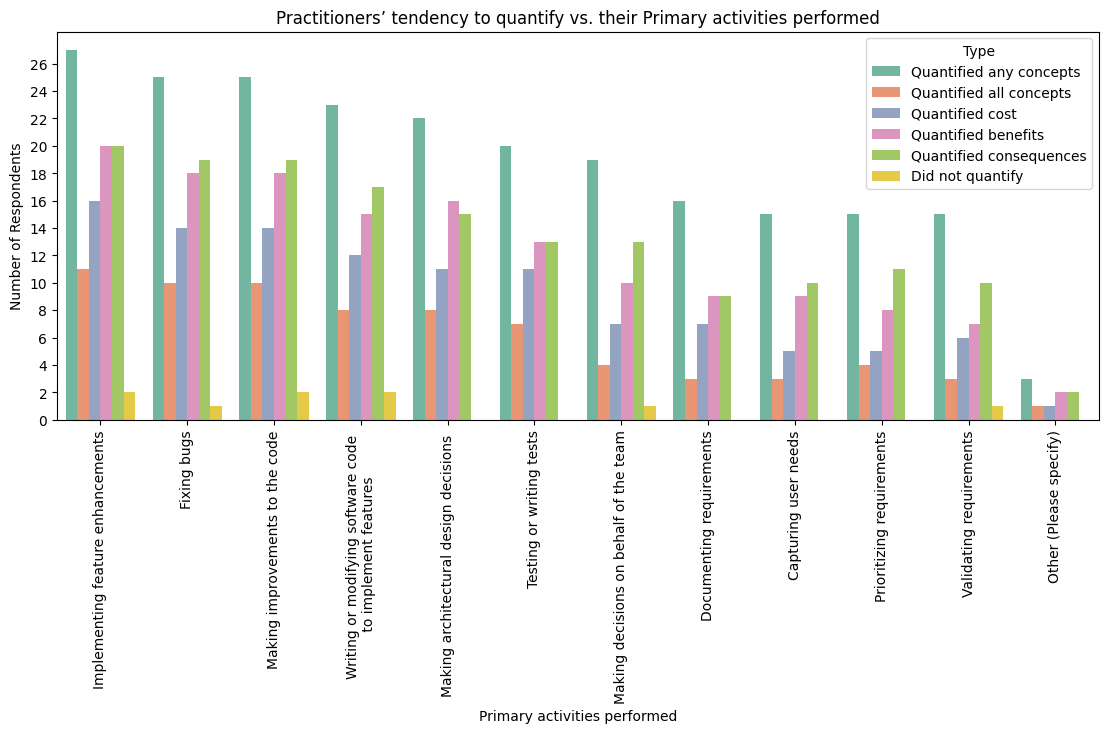

In [15]:
plot_qa_vs_not_qa(get_activity_counts(quantified_any), get_activity_counts(quantified_all), 
                  get_activity_counts(quantified_cost), get_activity_counts(quantified_benefit), get_activity_counts(quantified_consequence),
                  get_activity_counts(did_not_quantify_any), 'Primary activities performed', "Practitioners’ tendency to quantify vs. their ", rotate=90)

# Company profile and tendency to quantify

## Type of Organization

In [16]:
def get_org_counts(org_df):
    org_counts = org_df['Q34'].value_counts().reset_index()
    org_counts.columns = ['Type of Organization', 'Number of Respondents']
    org_counts['Type of Organization'] = org_counts['Type of Organization'].str.replace('-', '-\n')
    org_counts['Type of Organization'] = org_counts['Type of Organization'].str.replace('Small to Medium Business (SME)', 'SME')

    #calculate percentages
    # org_counts['Perentage of respondents'] = org_counts['Number of Respondents']/org_counts['Number of Respondents'].sum()*100

    # Calculate proportions
    #role_counts['Proportion'] = role_counts['Number of Respondents']

    return org_counts


/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

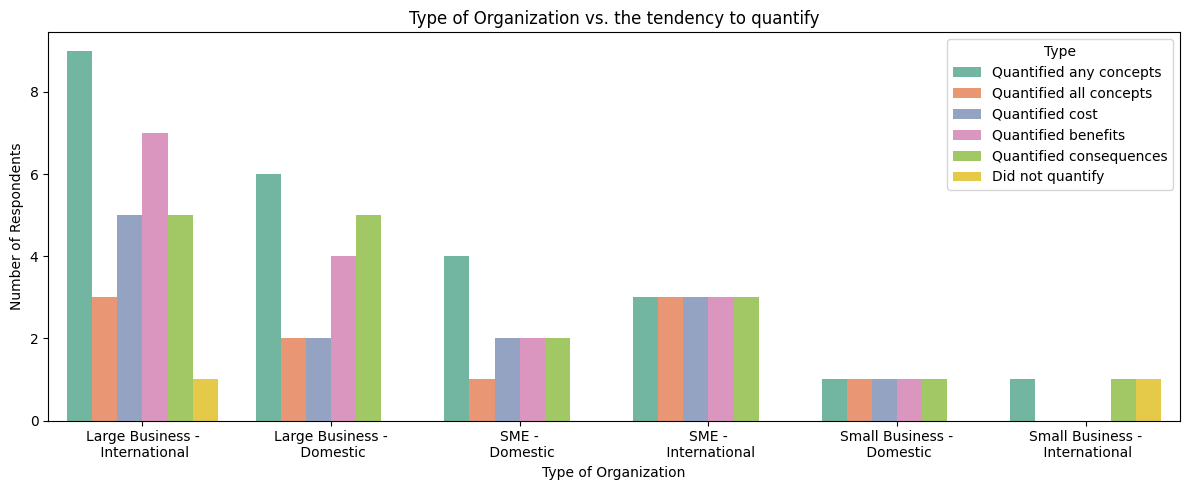

In [17]:
#plot_qa_vs_not_qa(get_org_counts(quantified_cost), get_org_counts(not_quantified_cost), 'Type of Organization', rotate=90)
plot_qa_vs_not_qa(get_org_counts(quantified_any), get_org_counts(quantified_all), 
                  get_org_counts(quantified_cost), get_org_counts(quantified_benefit), get_org_counts(quantified_consequence),
                  get_org_counts(did_not_quantify_any), 'Type of Organization', "", title_suffix=" vs. the tendency to quantify")


#save fig to plots folder

#plt.savefig('plots/D_type_of_org.svg')

## Development Methodology

In [18]:
def get_sw_dev_method_counts(dev_method_df):
    dev_method_counts = dev_method_df['Q37'].value_counts().reset_index()
    dev_method_counts.columns = ['Software Dev Method', 'Number of Respondents']
    dev_method_counts['Software Dev Method'] = dev_method_counts['Software Dev Method'].str.replace('/', '/\n').str.replace('and agile', '\n and agile')
    dev_method_counts['Software Dev Method'] = dev_method_counts['Software Dev Method'].str.replace('/', '/\n').str.replace('i.e., ', '\n i.e., ')

    #calculate percentages
    # role_counts['Perentage of respondents'] = role_counts['Number of Respondents']/len(valid_responses)*100
    return dev_method_counts

/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

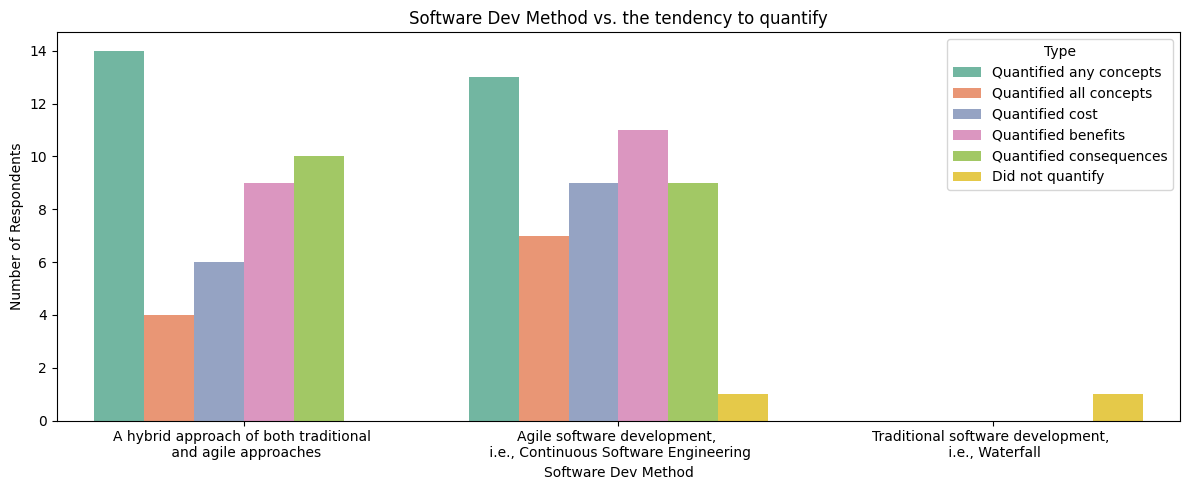

In [19]:
# any activity
plot_qa_vs_not_qa(get_sw_dev_method_counts(quantified_any), get_sw_dev_method_counts(quantified_all), 
                  get_sw_dev_method_counts(quantified_cost), get_sw_dev_method_counts(quantified_benefit), get_sw_dev_method_counts(quantified_consequence),
                  get_sw_dev_method_counts(did_not_quantify_any), 'Software Dev Method', "", title_suffix=" vs. the tendency to quantify")


#save fig to plots folder

#plt.savefig('plots/D_SW_dev_method.svg')

## Application Domain

In [20]:

def get_app_domain_counts(df):

    #data_formatting(data_formatting)

    domains = df['Q35'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)

    app_domain_counts = domains.value_counts().reset_index()

    #rename columns to Primary activities performed and Number of Respondents

    app_domain_counts.columns = ['Application Domains', 'Number of Respondents']
    #calculate percentages
    app_domain_counts['Perentage of respondents'] = app_domain_counts['Number of Respondents']/app_domain_counts['Number of Respondents'].sum()*100

    return app_domain_counts


/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

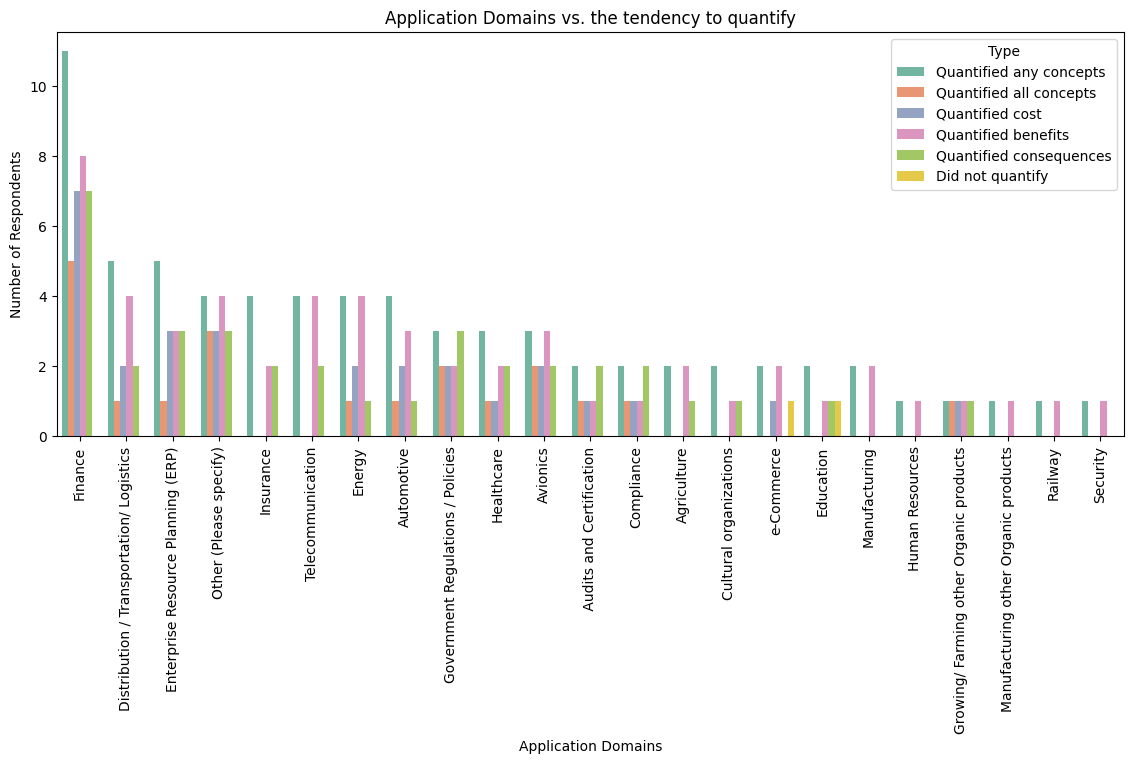

In [21]:
# any activity
plot_qa_vs_not_qa(get_app_domain_counts(quantified_any), get_app_domain_counts(quantified_all), 
                  get_app_domain_counts(quantified_cost), get_app_domain_counts(quantified_benefit), get_app_domain_counts(quantified_consequence),
                  get_app_domain_counts(did_not_quantify_any), 'Application Domains', "", title_suffix=" vs. the tendency to quantify", rotate=90)

# Quantification behaviours during a significant incident

## Comparison of quantification efforts for top three RTD instances fixed during the critical incident

In [28]:
contains_phrase = valid_responses['Q8'].str.contains('Changes in the requirements documentation', case=False, na=False)
filtered_records = valid_responses[contains_phrase]
len_doc = len(filtered_records)
contains_phrase = valid_responses['Q8'].str.contains('Lack of requirements validation with the user', case=False, na=False)
filtered_records = valid_responses[contains_phrase]
len_user = len(filtered_records)
contains_phrase = valid_responses['Q8'].str.contains('Insufficient documentation of requirement', case=False, na=False)
filtered_records = valid_responses[contains_phrase]
len_insuff = len(filtered_records)

len_doc, len_user, len_insuff

(21, 18, 17)

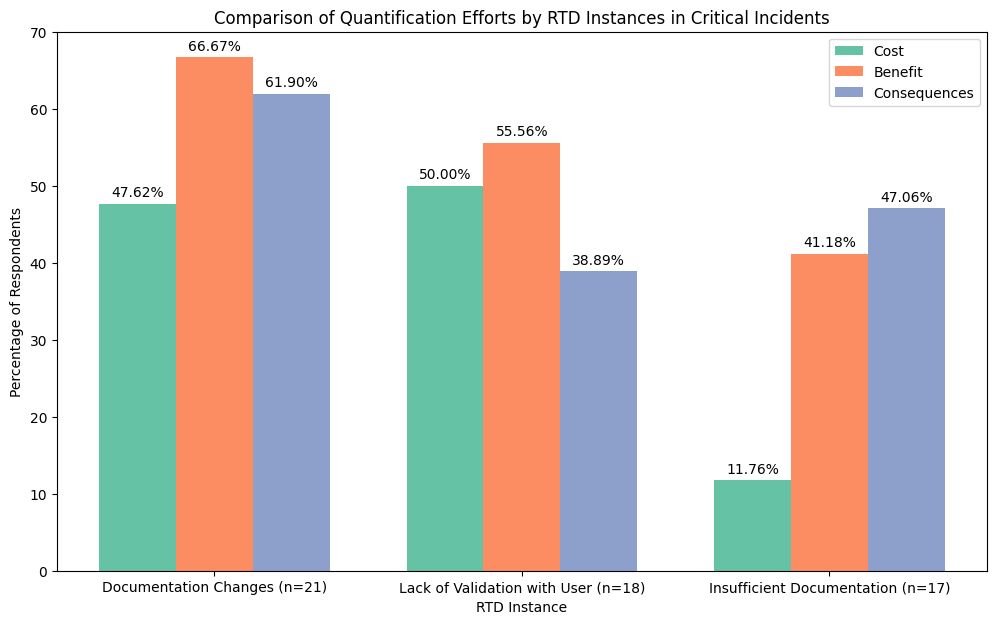

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming transposed_data is defined as follows
transposed_data = {
    'Metric': ['Documentation Changes (n=21)', 'Lack of Validation with User (n=18)', 'Insufficient Documentation (n=17)'],
    'Cost': [len(documentation_Q11) / len_doc * 100, len(validation_Q11) / len_user * 100, len(insufficient_doc_Q11) / len_insuff * 100],
    'Benefit': [len(documentation_Q13) / len_doc * 100, len(validation_Q13) / len_user * 100, len(insufficient_doc_Q13) / len_insuff * 100],
    'Consequences': [len(documentation_Q16) / len_doc * 100, len(validation_Q16) / len_user * 100, len(insufficient_doc_Q16) / len_insuff * 100]
}

# Convert the transposed data to a DataFrame
df = pd.DataFrame(transposed_data)

palette = sns.color_palette("Set2")

# Plotting the grouped bar chart
plt.figure(figsize=(12, 7))
bar_width = 0.25
index = range(len(df['Metric']))

# Adjust bar positions based on the new transposed data
bar1 = plt.bar(index, df['Cost'], width=bar_width, label='Cost', color=palette[0])
bar2 = plt.bar([p + bar_width for p in index], df['Benefit'], width=bar_width, label='Benefit', color=palette[1])
bar3 = plt.bar([p + bar_width * 2 for p in index], df['Consequences'], width=bar_width, label='Consequences', color=palette[2])

# Adjust the labels and title accordingly
plt.xlabel('RTD Instance')
plt.ylabel('Percentage of Respondents')
plt.title('Comparison of Quantification Efforts by RTD Instances in Critical Incidents')
plt.xticks([p + bar_width for p in index], df['Metric'])
plt.legend()

# Add labels above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{:.2f}%'.format(height),
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

# Save figure
plt.savefig('Plots/Disc_top_three_RTD_instances_percentage_transposed.svg')

plt.show()


# Agreement regarding concepts to quantify for decision-making

## Those who Agreed Vs Did not Agree and Those who Quantified Vs Did not Quantify

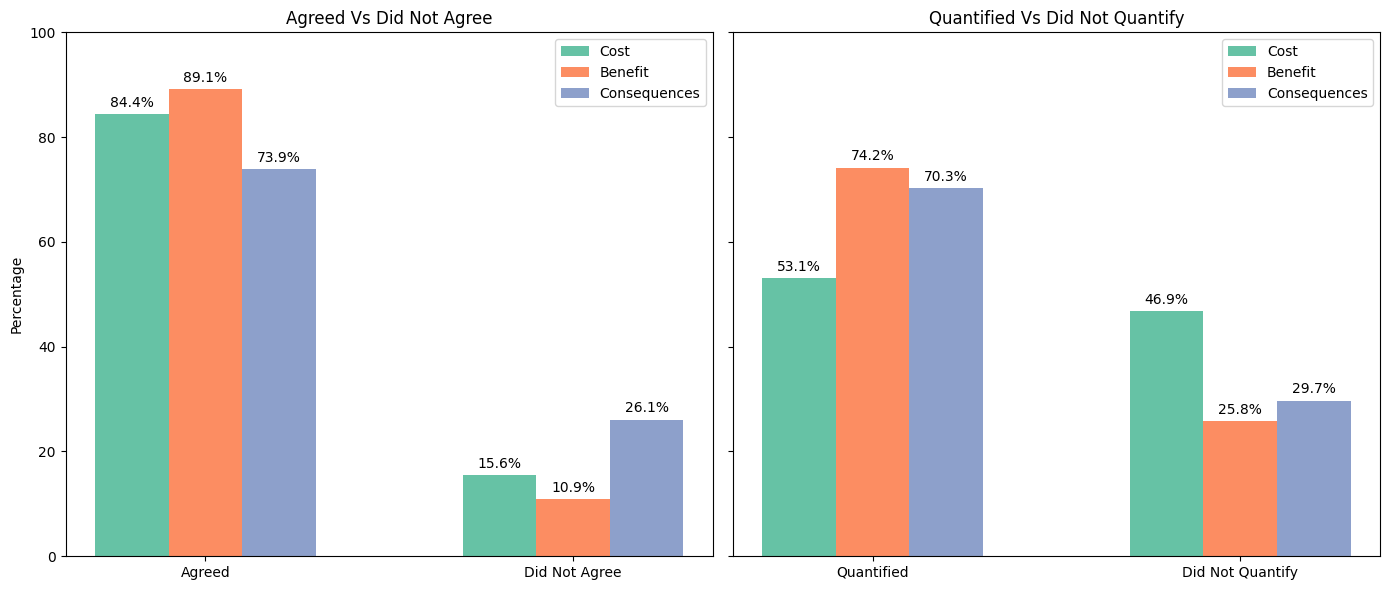

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the first table (Quantified/Did Not Quantify) with percentages
quantified_data = {
    'Categories': ['Quantified', 'Did Not Quantify'],
    'Cost': [(17/32)*100, (15/32)*100],
    'Benefit': [(23/31)*100, (8/31)*100],
    'Consequences': [(26/37)*100, (11/37)*100]
}

# Data for the second table (Agreed/Did Not Agree) with percentages
agreed_data = {
    'Categories': ['Agreed', 'Did Not Agree'],
    'Cost': [(38/45)*100, (7/45)*100],
    'Benefit': [(41/46)*100, (5/46)*100],
    'Consequences': [(34/46)*100, (12/46)*100]
}

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
palette = sns.color_palette("Set2")


# Plot for Agreed/Did Not Agree on the left
categories = np.arange(len(agreed_data['Categories']))
width = 0.2

rects1 = axes[0].bar(categories - width, agreed_data['Cost'], width, label='Cost', color=palette[0])
rects2 = axes[0].bar(categories, agreed_data['Benefit'], width, label='Benefit', color=palette[1])
rects3 = axes[0].bar(categories + width, agreed_data['Consequences'], width, label='Consequences', color=palette[2])
axes[0].set_xticks(categories)
axes[0].set_xticklabels(agreed_data['Categories'])
axes[0].set_ylim(0, 100)
axes[0].set_title('Agreed Vs Did Not Agree')
axes[0].set_ylabel('Percentage')
axes[0].legend()

# Plot for Quantified/Did Not Quantify on the right
categories = np.arange(len(quantified_data['Categories']))

rects4 = axes[1].bar(categories - width, quantified_data['Cost'], width, label='Cost', color=palette[0])
rects5 = axes[1].bar(categories, quantified_data['Benefit'], width, label='Benefit', color=palette[1])
rects6 = axes[1].bar(categories + width, quantified_data['Consequences'], width, label='Consequences', color=palette[2])
axes[1].set_xticks(categories)
axes[1].set_xticklabels(quantified_data['Categories'])
axes[1].set_ylim(0, 100)
axes[1].set_title('Quantified Vs Did Not Quantify')
axes[1].legend()

# Add labels above the bars
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, axes[0])
autolabel(rects2, axes[0])
autolabel(rects3, axes[0])
autolabel(rects4, axes[1])
autolabel(rects5, axes[1])
autolabel(rects6, axes[1])

fig.tight_layout()

#Save figure
plt.savefig('Plots/Disc_sub_plots_agree_vs_not_and_quantified_vs_not.svg')

plt.show()


## Agreed and quantified vs did NOT quantify

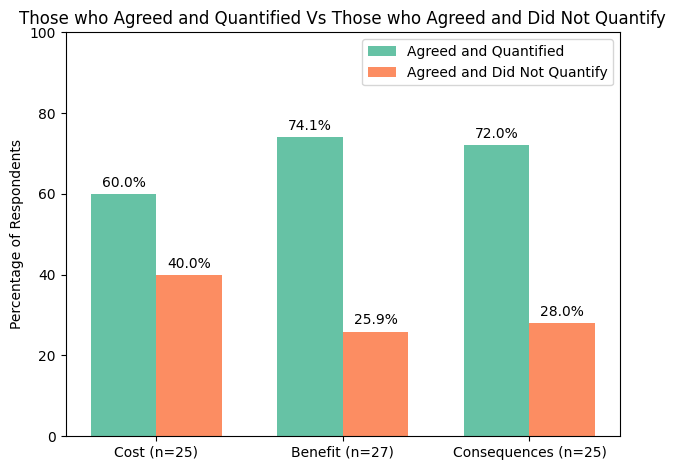

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Data as percentages
total_respondents = {
    'Cost': 25,  # 15 + 10
    'Benefit': 27,  # 20 + 7
    'Consequences':25   # 18 + 7
}

agreed_and_quantified_percent = [
    (15 / total_respondents['Cost']) * 100,
    (20 / total_respondents['Benefit']) * 100,
    (18 / total_respondents['Consequences']) * 100
]

agreed_and_did_not_quantify_percent = [
    (10 / total_respondents['Cost']) * 100,
    (7 / total_respondents['Benefit']) * 100,
    (7 / total_respondents['Consequences']) * 100
]

# Categories
categories = ['Cost (n=25)', 'Benefit (n=27)', 'Consequences (n=25)']
x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

# Create subplots
fig, ax = plt.subplots()
palette = sns.color_palette("Set2")

rects1 = ax.bar(x - width/2, agreed_and_quantified_percent, width, label='Agreed and Quantified', color=palette[0])
rects2 = ax.bar(x + width/2, agreed_and_did_not_quantify_percent, width, label='Agreed and Did Not Quantify', color=palette[1])

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of Respondents')
ax.set_title('Those who Agreed and Quantified Vs Those who Agreed and Did Not Quantify')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylim(0, 100)
ax.legend()

# Add labels above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()


#Save figure
plt.savefig('Plots/Disc_those_who_agreed_and_quantified_vs_agreed_and_did_not_quantify.svg')

plt.show()
